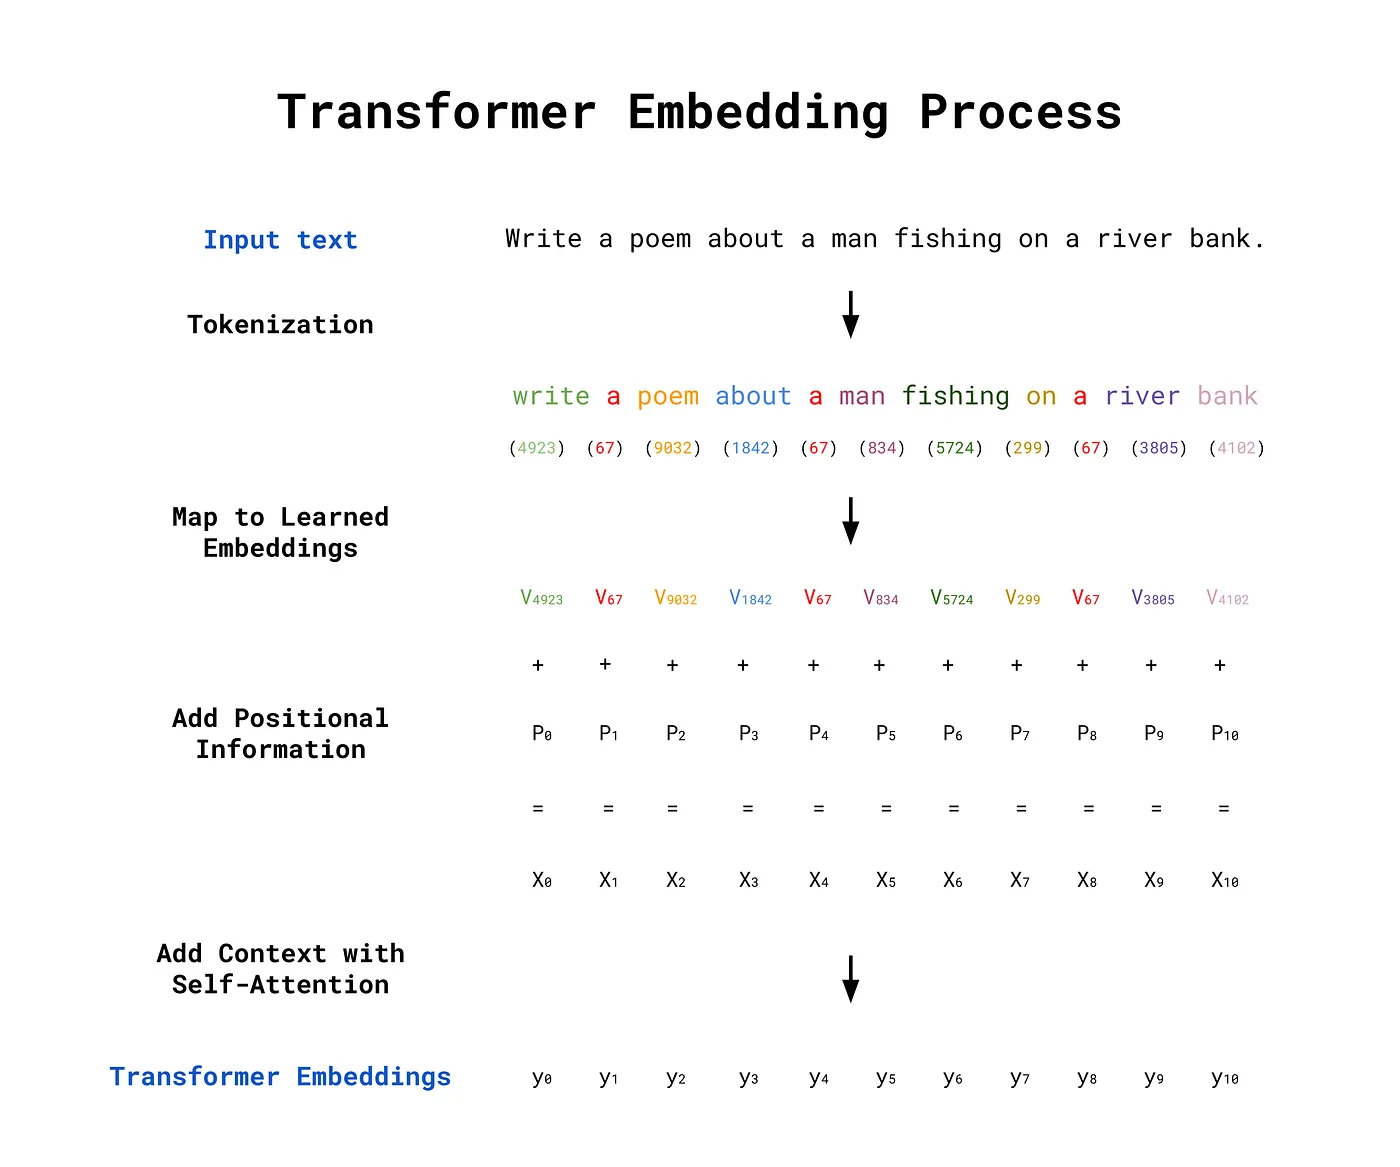

# Adding Positional Encoding to Embedding
    A positional embedding is a vector representation of a token's position in a sequence.

    - Word Embeddings capture the semantic meaning of the tokens.
    - Positional Embeddings encode the token positions to introduce the notion of order in the sequence.

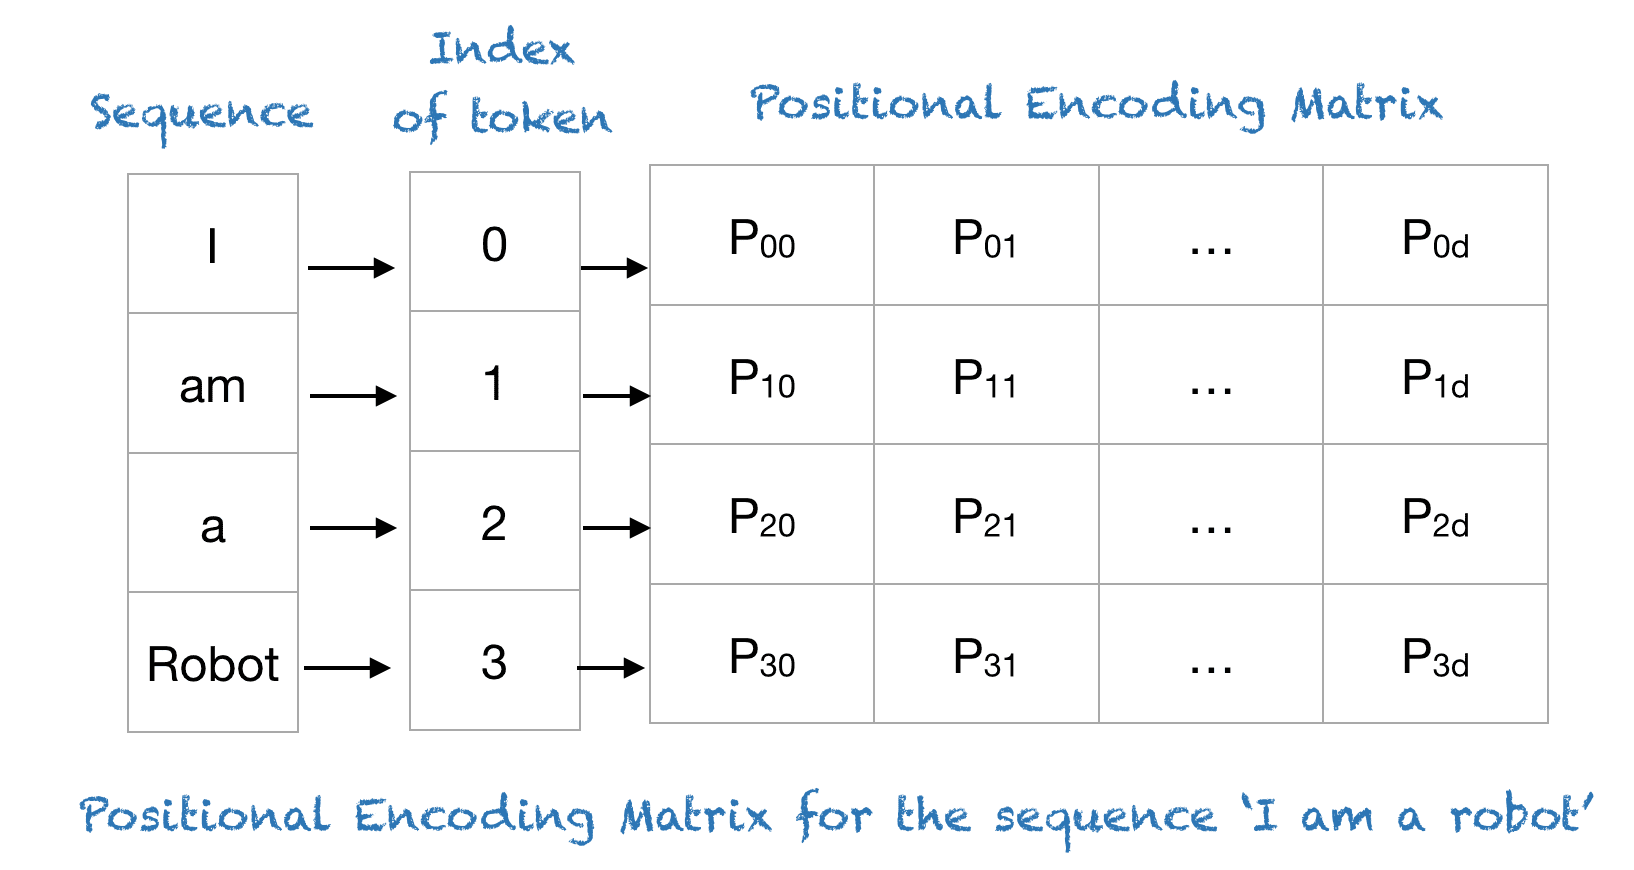

 ## Method 1 - Sinusoidal Positional Encoding in “Attention is All You Need”
    > The original transformer model was proposed with the following positional encoding functions:
    > - pos : is the position of the token in the sequence.
    > - i   : is the dimension index (either even or odd).
    > - d   : is the total dimension of the embedding.
> 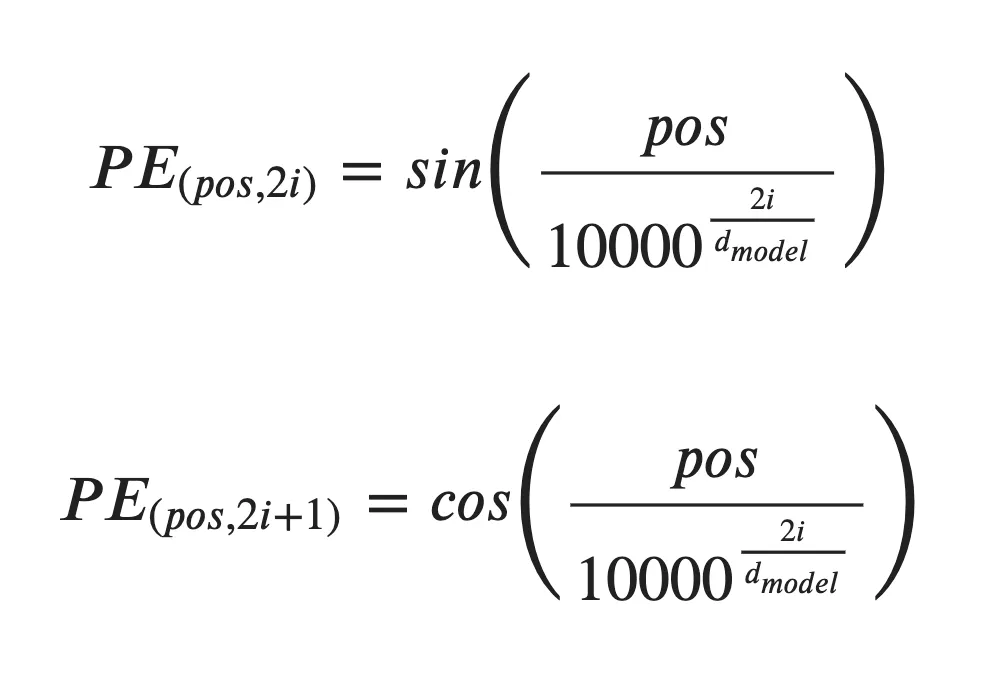


https://arxiv.org/abs/1706.03762

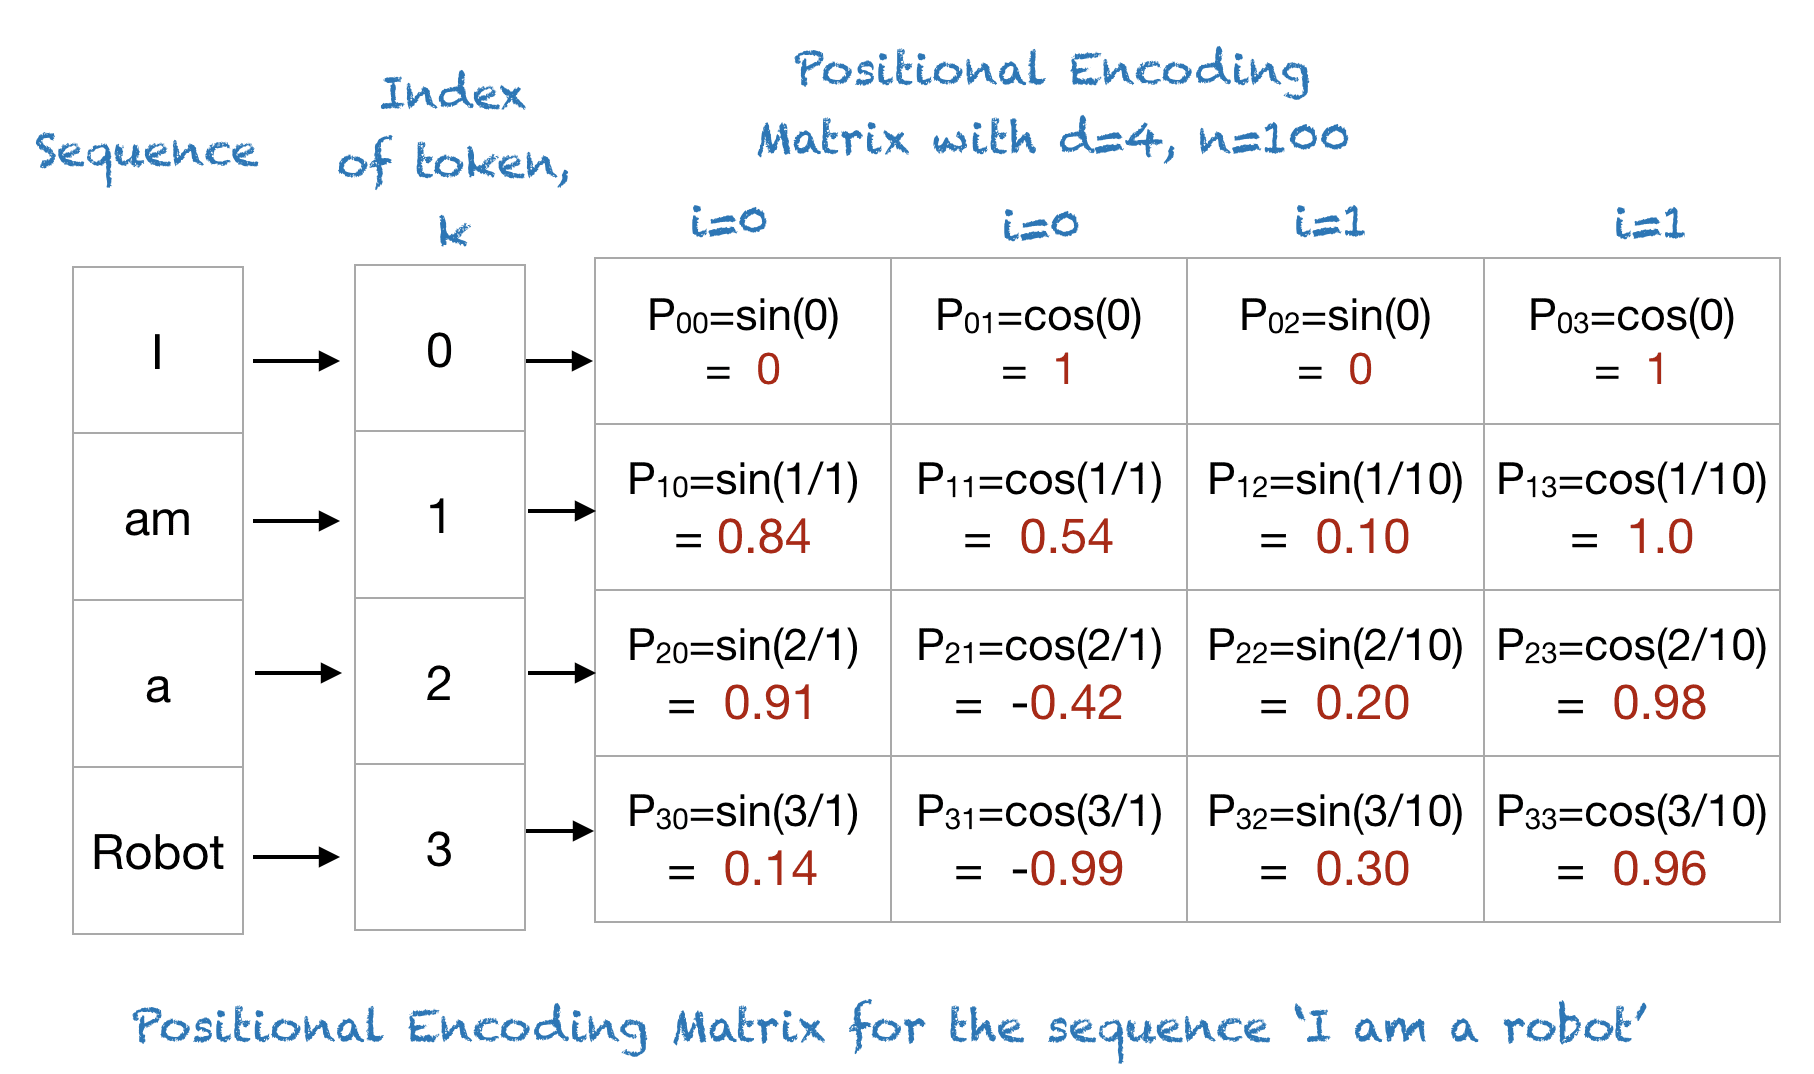

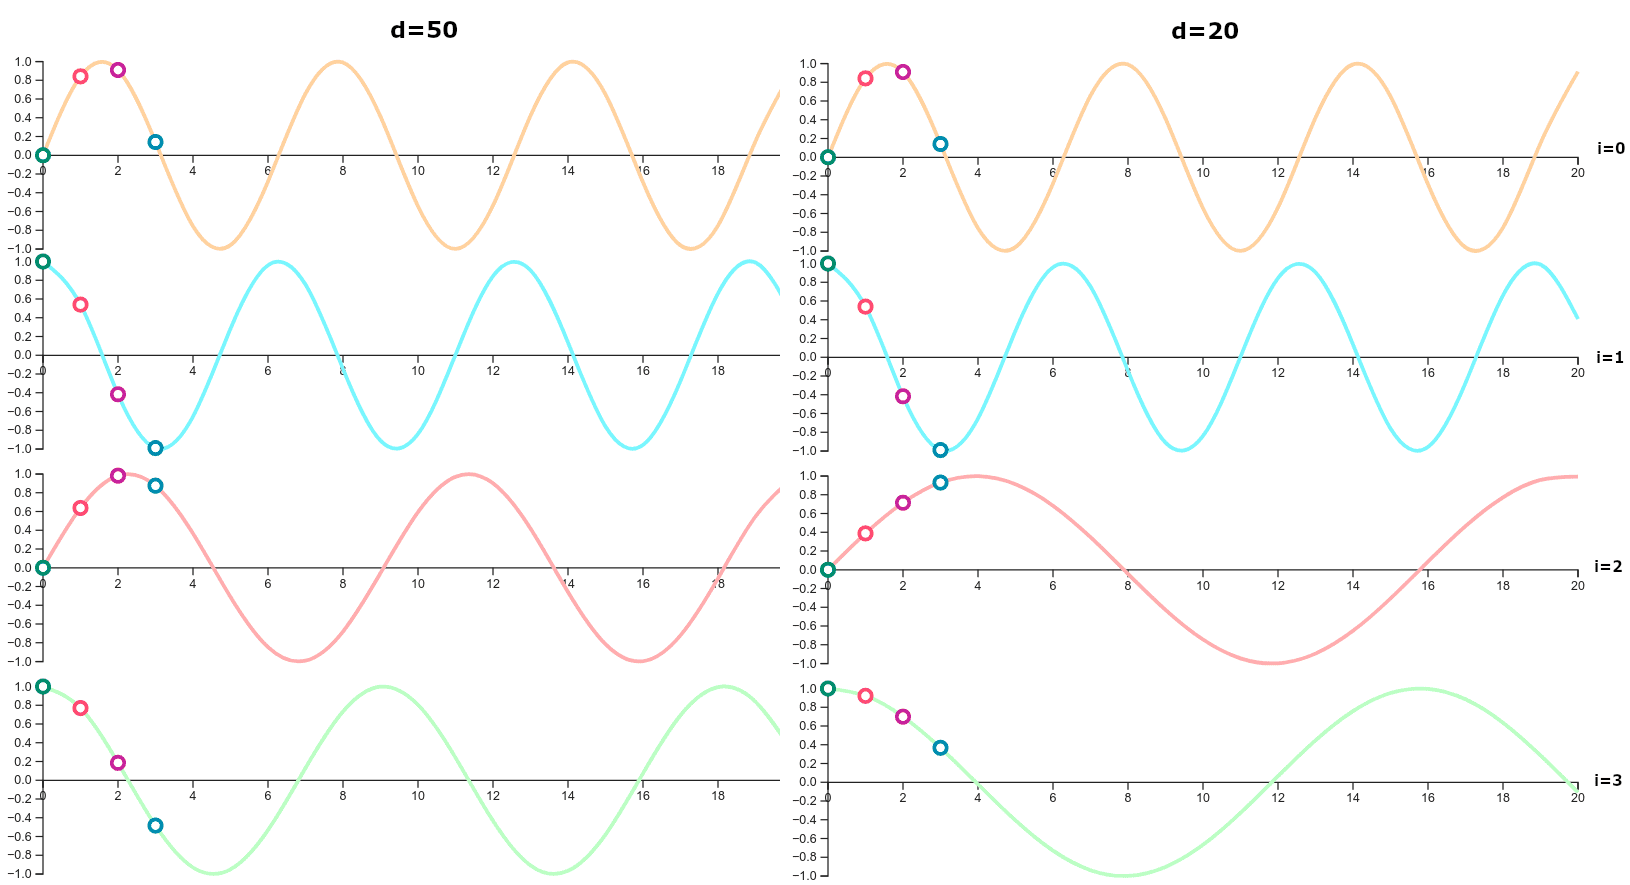

In [8]:
from transformers import AutoTokenizer
tokenizer   = AutoTokenizer.from_pretrained("bert-base-uncased") # WordPiece 
embedding_dim = 6

/Users/mani/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import math
import torch
import torch.nn as nn
#  Sinusoidal Positional Encoding
def get_positional_embeddings(seq_len, embedding_dim):
    # Create a matrix of shape (seq_len, embedding_dim) to hold the positional embeddings
    position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)  # shape (seq_len, 1)
    div_term = torch.exp(torch.arange(0, embedding_dim, 2).float() * (-math.log(10000.0) / embedding_dim))  # shape (embedding_dim/2)
    
    # Apply sin to even indices in the embedding dimension and cos to odd indices
    pe = torch.zeros(seq_len, embedding_dim)
    pe[:, 0::2] = torch.sin(position * div_term)  # Apply sin to even indices
    pe[:, 1::2] = torch.cos(position * div_term)  # Apply cos to odd indices
    
    return pe

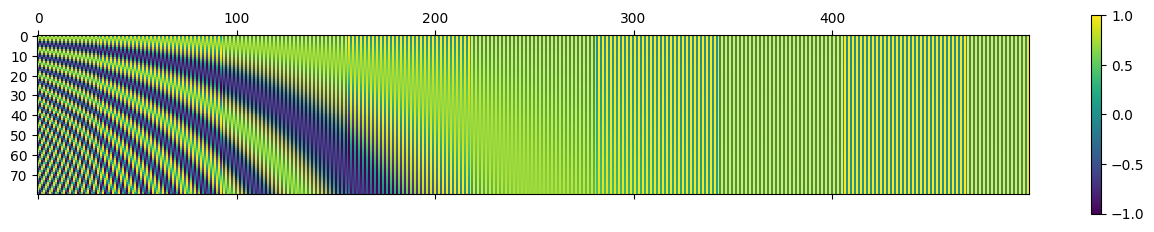

In [10]:
import matplotlib.pyplot as plt
P = get_positional_embeddings(seq_len=80, embedding_dim=500)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)

In [11]:
text = "Tokenization is the process of breaking down text into smaller units"
text_fa = "توکن‌سازی فرآیند شکستن متن به واحدهای کوچکتر است"

In [12]:
_token = tokenizer.tokenize(text)
print('Token: ',_token)

inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs['input_ids']  # Token IDs
print('\nIDs: ',input_ids)
print("Token Count: ", input_ids.shape[1])

# Get embeddings for the sentence

embedding = nn.Embedding(tokenizer.vocab_size, embedding_dim)
print(embedding)
word_embeddings = embedding(input_ids)
print("Word Embeddings Shape:", word_embeddings.shape )
print("Word Embeddings:\n", word_embeddings.detach())

Token:  ['token', '##ization', 'is', 'the', 'process', 'of', 'breaking', 'down', 'text', 'into', 'smaller', 'units']

IDs:  tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997,  4911,  2091,  3793,
          2046,  3760,  3197,   102]])
Token Count:  14
Embedding(30522, 6)
Word Embeddings Shape: torch.Size([1, 14, 6])
Word Embeddings:
 tensor([[[-1.3323e-01,  1.5383e+00,  4.4857e-01, -7.6712e-01, -1.6558e-01,
           8.6876e-01],
         [-5.8201e-01,  2.0650e-01,  3.0274e-01, -4.1710e-01, -5.1791e-01,
          -4.2003e-01],
         [ 7.0628e-01, -1.9021e+00,  9.4472e-01,  6.0440e-01, -2.9440e-01,
          -1.4830e+00],
         [-8.7886e-01, -7.2812e-02,  5.3667e-01, -1.6411e-01, -6.3335e-01,
          -1.1836e+00],
         [-1.4605e+00,  2.7861e-01, -4.0771e-01, -4.5432e-01,  1.4704e+00,
          -5.6785e-01],
         [ 9.6466e-01, -2.3156e-01,  6.3481e-01, -1.1142e-02,  8.9269e-01,
          -2.5298e+00],
         [ 4.8218e-01, -1.0752e+00,  1.7642e+00, -3.7935e-01, -

In [13]:
max_seq_len = input_ids.size(1)

positions_embedded = get_positional_embeddings(max_seq_len, embedding_dim)
print("Positional Encoding:\n", positions_embedded)
print("Shape:", positions_embedded.shape)  

Positional Encoding:
 tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998],
        [-0.5440, -0.8391,  0.4477,  0.8942,  0.0215,  0.9998],
        [-1.0000,  0.0044,  0.4887,  0.8725,  0.0237,  0.9997],
        [-0.5366,  0.8439,  0.5286,  0.8488,  0.0259,  0.9997],
        [ 0.4202,  0.9074,  0.5675,  0.8234,  0.0280,  0.9996]])
Shape: torch.Size([14, 6])


In [14]:
# Final Embedding = Word Embedding + Positional Embedding
final_embeddings = word_embeddings + positions_embedded

print("Final Embeddings (Word + Positional):\n", final_embeddings)
print("Shape:", final_embeddings.shape)  # (batch_size, sequence_length, embedding_size)

Final Embeddings (Word + Positional):
 tensor([[[-0.1332,  2.5383,  0.4486,  0.2329, -0.1656,  1.8688],
         [ 0.2595,  0.7468,  0.3491,  0.5818, -0.5158,  0.5800],
         [ 1.6156, -2.3183,  1.0374,  1.6001, -0.2901, -0.4830],
         [-0.7377, -1.0628,  0.6755,  0.8262, -0.6269, -0.1836],
         [-2.2173, -0.3750, -0.2231,  0.5285,  1.4790,  0.4321],
         [ 0.0057,  0.0521,  0.8648,  0.9620,  0.9035, -1.5299],
         [ 0.2028, -0.1150,  2.0391,  0.5821, -0.2840,  2.1199],
         [ 1.4369,  1.7468, -0.6536,  0.1386, -1.3393,  0.6983],
         [ 1.7123,  0.8533, -0.3400,  0.0401, -0.8781,  2.5182],
         [ 1.4099, -1.0825, -0.4156,  1.1103,  0.8277, -0.5065],
         [-1.9433,  0.0357,  1.3041, -0.4295, -0.6264, -0.0222],
         [-1.4882, -0.6544,  0.9693,  1.8992, -1.9013,  2.2082],
         [-0.0119, -0.3896,  0.9826, -0.0923,  0.9452, -0.0974],
         [ 0.4202,  0.5691, -0.2538,  2.7516,  1.0913,  1.0641]]],
       grad_fn=<AddBackward0>)
Shape: torch.Size(

 ## Method 2: Learnable Positional Embeddings using nn.Embedding
    An embedding layer that creates embedding using position data

In [16]:

_token = tokenizer.tokenize(text)
print('Token: ',_token)

inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs['input_ids']  # Token IDs
print('\nIDs: ',input_ids)
print("Token Count: ", input_ids.shape[1])

# Get embeddings for the sentence
embedding = nn.Embedding(tokenizer.vocab_size, embedding_dim)
print(embedding)
word_embeddings = embedding(input_ids)
print("Word Embeddings Shape:", word_embeddings.shape )
print("Word Embeddings:\n", word_embeddings.detach())

Token:  ['token', '##ization', 'is', 'the', 'process', 'of', 'breaking', 'down', 'text', 'into', 'smaller', 'units']

IDs:  tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997,  4911,  2091,  3793,
          2046,  3760,  3197,   102]])
Token Count:  14
Embedding(30522, 6)
Word Embeddings Shape: torch.Size([1, 14, 6])
Word Embeddings:
 tensor([[[ 2.0501,  1.3267,  0.7013,  0.7162,  0.7631, -1.2841],
         [-0.2347, -0.0694,  0.9734, -0.3285, -0.1390,  1.1746],
         [-1.4438, -1.1876,  0.0631,  2.4278,  1.5926, -1.3200],
         [ 0.3597, -0.1310, -0.3015, -0.7837,  0.1986,  1.5414],
         [ 1.3096,  0.5651,  2.2555,  3.5035, -0.8390,  0.1108],
         [-0.6815, -0.8852, -0.5334,  2.0016, -2.0137, -0.6810],
         [ 0.4016, -0.0368, -0.0221,  0.0752,  0.7003, -1.0012],
         [ 1.6535,  0.1198, -0.3333, -0.1413, -0.0741, -0.5017],
         [ 0.4478,  0.6618, -0.7278,  0.7530,  0.2129,  0.8016],
         [-0.3727, -1.4744,  0.5622,  1.0053, -0.7081,  1.5705],
       

In [19]:
max_seq_len = input_ids.size(1)
positional_embedding = nn.Embedding(num_embeddings=max_seq_len, embedding_dim=embedding_dim)

In [20]:
# Simulate positions for each token (0, 1, 2, ..., for each token in the sequence)
positions = torch.arange(0, input_ids.size(1)).unsqueeze(0).repeat(input_ids.size(0), 1)

In [24]:
torch.arange(0, input_ids.size(1))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [31]:
positions

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]])

In [33]:
# Get the positional embeddings for each position in the sequence
pos_embedded = positional_embedding(positions)

print("Positional Encoding:\n", pos_embedded)
print("Shape:", pos_embedded.shape)  

Positional Encoding:
 tensor([[[-1.0260,  0.7100,  0.6088, -0.8936, -0.4446, -0.6158],
         [-0.5659,  0.9435, -0.6938,  0.8723, -0.3986,  1.1933],
         [-0.0391,  0.7457,  0.0971, -0.0499, -0.2447, -0.0124],
         [ 0.2931, -0.8176, -0.7523, -0.9515,  1.2145, -1.8945],
         [ 0.7430,  0.5429, -0.6878, -1.4124, -0.1619, -0.0442],
         [ 0.0988, -1.2349,  0.4793, -1.0106,  0.0366, -0.3178],
         [ 0.7214,  1.1263,  0.3461,  0.0549,  0.3830, -0.4695],
         [-0.0266, -0.3381,  0.2230,  0.3292, -0.0101,  0.0950],
         [ 0.8675, -0.7262,  2.0428, -3.6184,  0.1741,  0.2848],
         [ 0.8163,  1.5648, -1.6773,  0.4688,  0.3829, -0.3627],
         [ 0.9913, -0.1796, -2.5088,  0.9968, -0.5126,  0.1909],
         [-1.1656, -0.4603,  1.8087, -0.9035, -0.1535,  0.9954],
         [-1.8355,  0.3683, -0.1203,  0.8592, -1.3514,  2.1196],
         [ 1.4786, -0.9057, -1.6483,  0.7561, -0.1644, -0.3321]]],
       grad_fn=<EmbeddingBackward0>)
Shape: torch.Size([1, 14, 6])

In [35]:

print("Word Embeddings:\n", word_embeddings)
print("Shape:", word_embeddings.shape)  

Word Embeddings:
 tensor([[[ 2.0501,  1.3267,  0.7013,  0.7162,  0.7631, -1.2841],
         [-0.2347, -0.0694,  0.9734, -0.3285, -0.1390,  1.1746],
         [-1.4438, -1.1876,  0.0631,  2.4278,  1.5926, -1.3200],
         [ 0.3597, -0.1310, -0.3015, -0.7837,  0.1986,  1.5414],
         [ 1.3096,  0.5651,  2.2555,  3.5035, -0.8390,  0.1108],
         [-0.6815, -0.8852, -0.5334,  2.0016, -2.0137, -0.6810],
         [ 0.4016, -0.0368, -0.0221,  0.0752,  0.7003, -1.0012],
         [ 1.6535,  0.1198, -0.3333, -0.1413, -0.0741, -0.5017],
         [ 0.4478,  0.6618, -0.7278,  0.7530,  0.2129,  0.8016],
         [-0.3727, -1.4744,  0.5622,  1.0053, -0.7081,  1.5705],
         [ 0.8907,  0.9797, -0.3327,  0.5720,  0.1474,  0.1911],
         [ 0.5990, -0.5442,  0.0045,  1.6728, -2.2948, -0.6337],
         [-0.6150,  0.7325, -1.1049, -0.4725,  0.9149, -2.2201],
         [-0.0401,  0.3767, -0.4645, -0.2798, -0.6190,  0.6841]]],
       grad_fn=<EmbeddingBackward0>)
Shape: torch.Size([1, 14, 6])


In [37]:
# Combine word and positional embeddings by summing them
combined_embeddings = word_embeddings + pos_embedded
print(f"Combined Embeddings shape: {combined_embeddings.shape}")  # Should be [batch_size, seq_len, embedding_dim]
combined_embeddings

Combined Embeddings shape: torch.Size([1, 14, 6])


tensor([[[ 1.0241,  2.0367,  1.3101, -0.1774,  0.3185, -1.8999],
         [-0.8006,  0.8740,  0.2795,  0.5438, -0.5375,  2.3679],
         [-1.4829, -0.4418,  0.1602,  2.3780,  1.3479, -1.3324],
         [ 0.6527, -0.9486, -1.0538, -1.7352,  1.4131, -0.3531],
         [ 2.0526,  1.1080,  1.5677,  2.0911, -1.0009,  0.0667],
         [-0.5826, -2.1202, -0.0540,  0.9910, -1.9772, -0.9989],
         [ 1.1230,  1.0895,  0.3240,  0.1301,  1.0833, -1.4707],
         [ 1.6269, -0.2182, -0.1103,  0.1878, -0.0842, -0.4067],
         [ 1.3153, -0.0644,  1.3150, -2.8654,  0.3870,  1.0864],
         [ 0.4436,  0.0904, -1.1150,  1.4741, -0.3253,  1.2077],
         [ 1.8819,  0.8001, -2.8415,  1.5688, -0.3652,  0.3819],
         [-0.5666, -1.0045,  1.8132,  0.7693, -2.4483,  0.3617],
         [-2.4504,  1.1008, -1.2252,  0.3868, -0.4365, -0.1005],
         [ 1.4385, -0.5290, -2.1128,  0.4763, -0.7834,  0.3520]]],
       grad_fn=<AddBackward0>)

In [39]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [40]:
model.embeddings

BertEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [41]:
word_embeddings = model.embeddings.word_embeddings.weight
print("word Embeddings:\n", word_embeddings,"Shape:", word_embeddings.shape)

word Embeddings:
 Parameter containing:
tensor([[-0.0102, -0.0615, -0.0265,  ..., -0.0199, -0.0372, -0.0098],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0015, -0.0821, -0.0160,  ..., -0.0081, -0.0475,  0.0753]],
       requires_grad=True) Shape: torch.Size([30522, 768])


In [42]:
pos_embeddings = model.embeddings.position_embeddings.weight
print("Position Embeddings:\n", pos_embeddings,"Shape:", pos_embeddings.shape)

Position Embeddings:
 Parameter containing:
tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        ...,
        [ 1.7418e-02,  3.4903e-03, -9.5621e-03,  ...,  2.9599e-03,
          4.3435e-04, -2.6949e-02],
        [ 2.1687e-02, -6.0216e-03,  1.4736e-02,  ..., -5.6118e-03,
         -1.2590e-02, -2.8085e-02],
        [ 2.6413e-03, -2.3298e-02,  5.4922e-03,  ...,  1.7537e-02,
          2.7550e-02, -7.7656e-02]], requires_grad=True) Shape: torch.Size([512, 768])
